Практическая работа № 1

Задание №1

Для начала инициализируем наши распределения


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis, norm
import seaborn as sns

# Моделируем нормальное распределение
normal_distribution = np.random.normal(size=1000)

# Моделируем экспоненциальное распределение
exponential_distribution = np.random.exponential(size=1000)
# Моделируем равномерное распределение
uniform_distribution = np.random.uniform(size=1000)

# Моделируем биномиальное распределение
binomial_distribution = np.random.binomial(10, 0.5, size=1000)

Теперь инициализируем словари для работы с распределениями

In [16]:
# Словарь с результатами
results = {}

# Словарь с названиями распределений
distributions = {
    "Нормальное распределение": normal_distribution,
    "Экспоненциальное распределение": exponential_distribution,
    "Равномерное распределение": uniform_distribution,
    "Биномиальное распределение": binomial_distribution
}

Теперь пройдемся по циклу, где будем рассчитывать описательные
После вычисления результатов сразу строятся графики

Нормальное распределение
{'Минимум': -2.957097508692181, 'Максимум': 3.3161178045297866, 'Мат.ожидание': 0.019356761599430762, 'Дисперсия': 0.9992082557703043, 'Стандартное отклонение': 0.9996040494967516, 'Квантиль уровня 0.25': -0.6517025675201853, 'Квантиль уровня 0.75': 0.6817622938651556, 'Размах': 6.273215313221968, 'Медиана': 0.02973121059046148, 'Коэффициент ассиметрий': -0.005718634843213388, 'Коэффициент эксцесса': -0.16960645450135114}


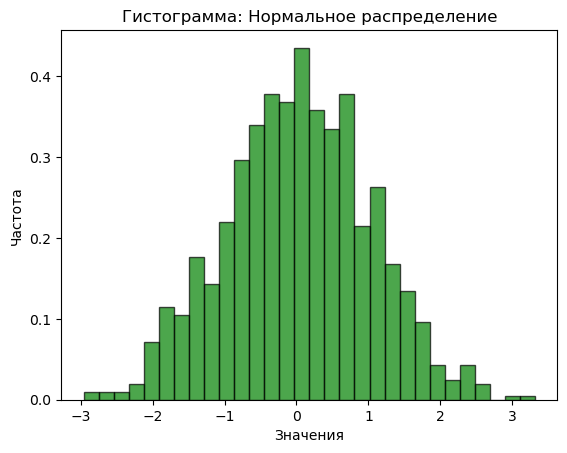

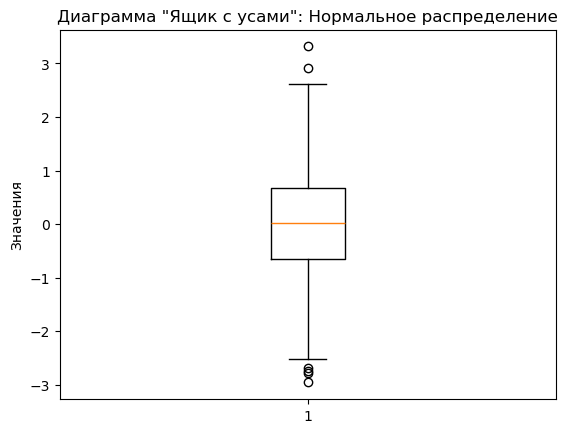

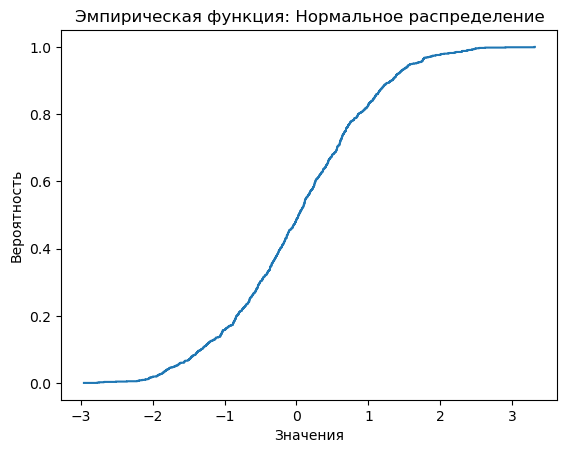

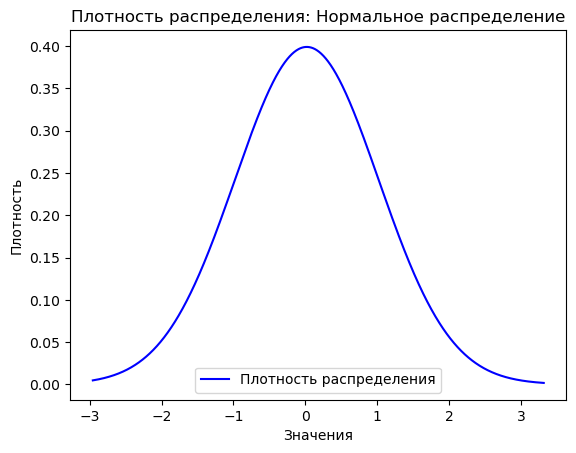

Экспоненциальное распределение
{'Минимум': 0.0016749590050177678, 'Максимум': 7.135366810110598, 'Мат.ожидание': 1.0363272980348779, 'Дисперсия': 1.077218935142991, 'Стандартное отклонение': 1.037891581593661, 'Квантиль уровня 0.25': 0.307899455843637, 'Квантиль уровня 0.75': 1.4753176733760545, 'Размах': 7.13369185110558, 'Медиана': 0.7282175632348264, 'Коэффициент ассиметрий': 2.0363561865020436, 'Коэффициент эксцесса': 5.904862022873493}


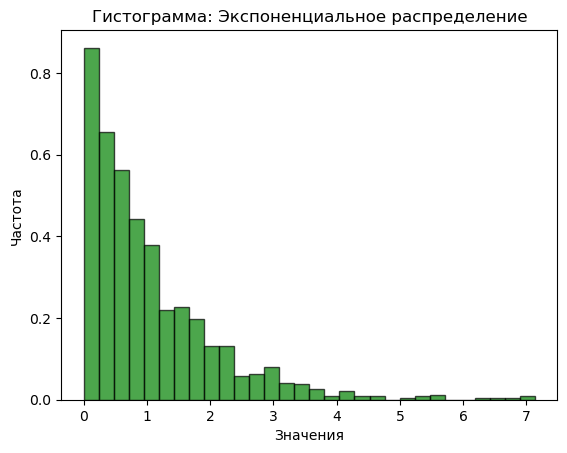

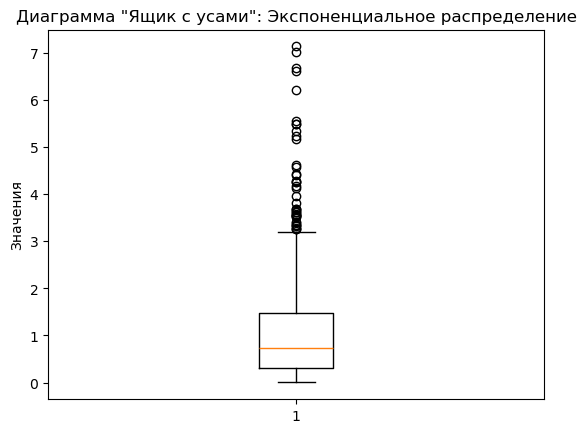

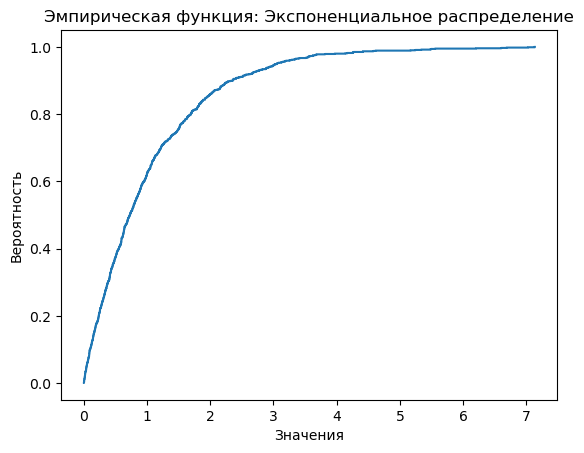

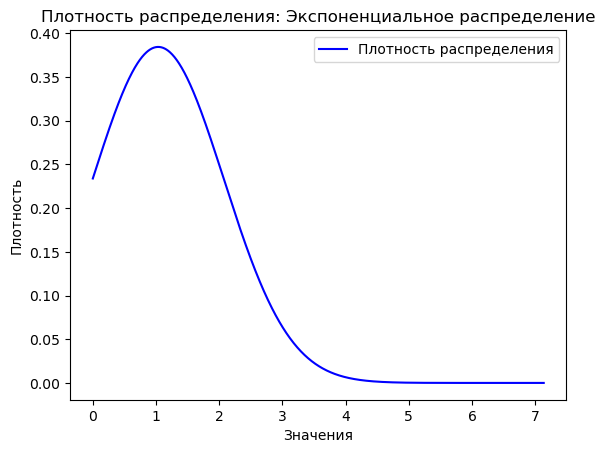

Равномерное распределение
{'Минимум': 0.00010649277952734515, 'Максимум': 0.9999558379282265, 'Мат.ожидание': 0.4987302357435742, 'Дисперсия': 0.08494389472256997, 'Стандартное отклонение': 0.29145135910228653, 'Квантиль уровня 0.25': 0.2411103708832834, 'Квантиль уровня 0.75': 0.7569032316816694, 'Размах': 0.9998493451486992, 'Медиана': 0.4995723369780662, 'Коэффициент ассиметрий': -0.0029613594559914145, 'Коэффициент эксцесса': -1.1972834897026285}


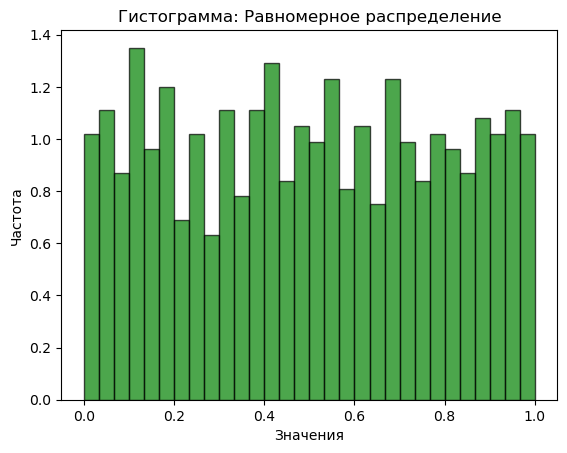

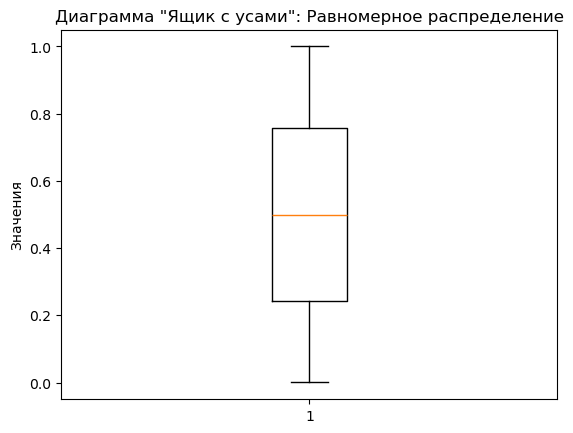

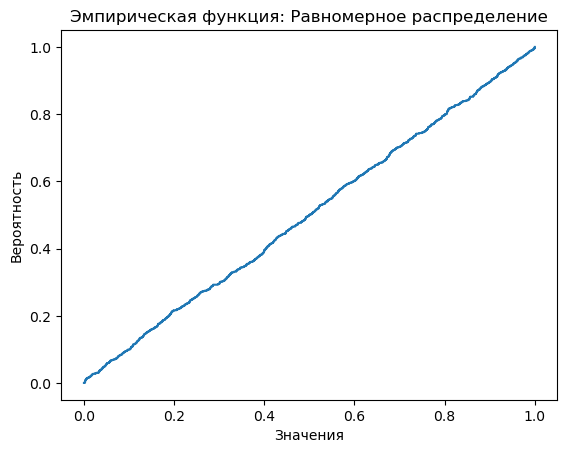

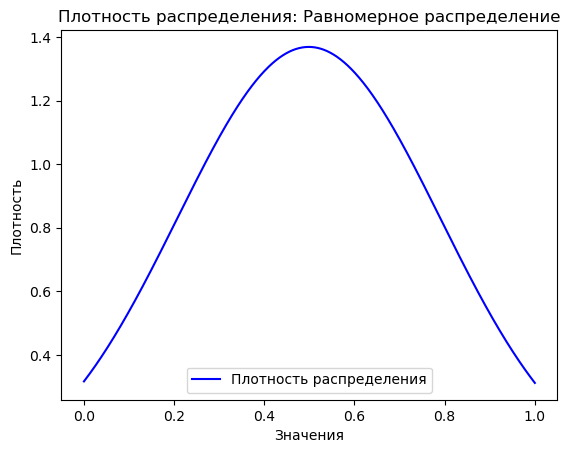

Биномиальное распределение
{'Минимум': 0, 'Максимум': 9, 'Мат.ожидание': 4.955, 'Дисперсия': 2.294975000000001, 'Стандартное отклонение': 1.5149174895023163, 'Квантиль уровня 0.25': 4.0, 'Квантиль уровня 0.75': 6.0, 'Размах': 9, 'Медиана': 5.0, 'Коэффициент ассиметрий': -0.006640568596239645, 'Коэффициент эксцесса': -0.23690825253799197}


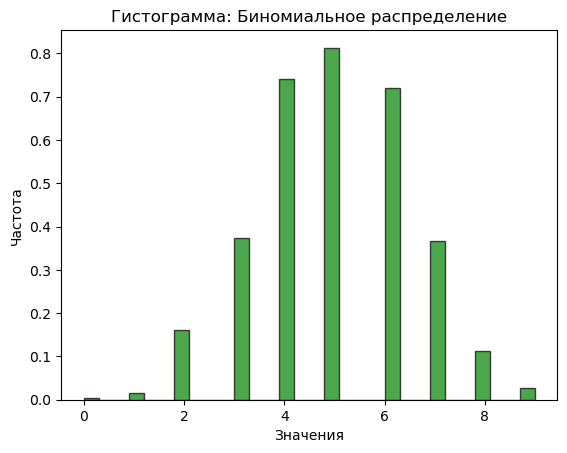

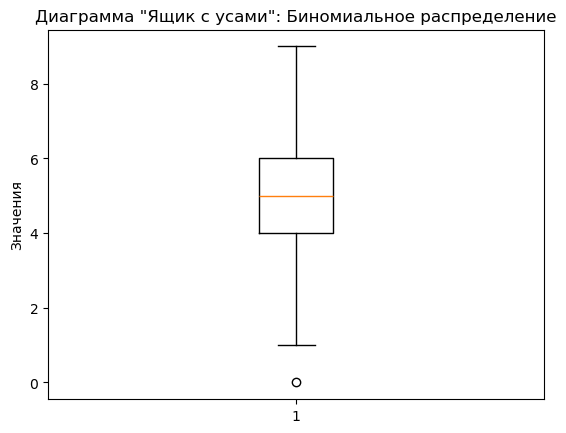

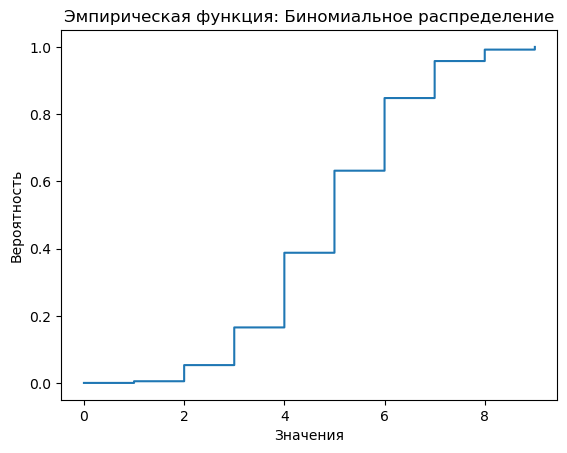

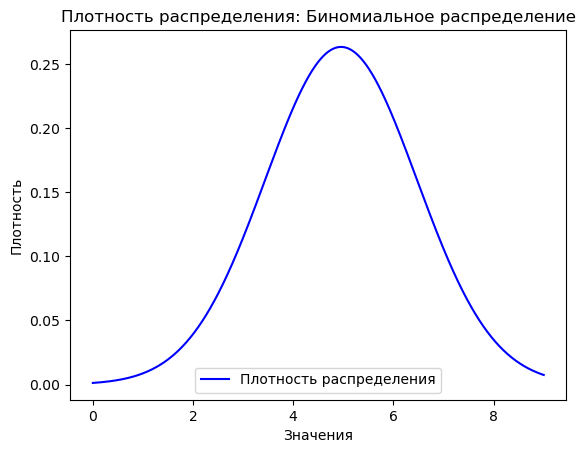

In [18]:
for key, item in distributions.items():
    results[key] = {}
    results[key]['Минимум'] = np.min(item)
    results[key]['Максимум'] = np.max(item)
    results[key]['Мат.ожидание'] = np.mean(item)
    results[key]['Дисперсия'] = np.mean(item ** 2) - (np.mean(item) ** 2)
    results[key]['Стандартное отклонение'] = np.sqrt(
        np.mean(item ** 2) - (np.mean(item) ** 2))  # Корень из дисперсий
    # 25, потому что 0.25 переводим в проценты. аналогично и 75
    results[key]['Квантиль уровня 0.25'] = np.percentile(np.sort(item), 25)
    results[key]['Квантиль уровня 0.75'] = np.percentile(np.sort(item), 75)
    results[key]['Размах'] = np.max(item) - np.min(item)
    results[key]['Медиана'] = np.median(item)
    results[key]['Коэффициент ассиметрий'] = skew(item)
    results[key]['Коэффициент эксцесса'] = kurtosis(item)
    print(key)
    print(results[key])

    # Показ гистограммы
    plt.hist(item, bins=30, density=True, alpha=0.7, color='g', edgecolor='black')
    # Настройка графика
    plt.title(f'Гистограмма: {key}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')

    # Показать гистограмму
    plt.show()

    # Показ ящика с усами
    plt.boxplot(item)
    plt.title(f'Диаграмма "Ящик с усами": {key}')
    plt.ylabel('Значения')
    plt.show()

    # Показ эмпирической функций
    sorted_data = np.sort(item)

    probabilities = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Построение эмпирической функции (ECDF)
    plt.step(sorted_data, probabilities, where='post')

    # Настройка графика
    plt.title(f'Эмпирическая функция: {key}')
    plt.xlabel('Значения')
    plt.ylabel('Вероятность')

    # Показать график
    plt.show()

    # Создаем массив значений x от минимального до максимального значения данных
    x = np.linspace(np.min(item), np.max(item), 1000)

    # Вычисляем значения плотности вероятности для каждого значения x (нормальное распределение)
    y = norm.pdf(x, np.mean(item), np.std(item))

    # Строим график плотности распределения
    plt.plot(x, y, color='blue', label='Плотность распределения')
    plt.title(f'Плотность распределения: {key}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

Инициализируем словари

In [20]:
# словарь с выборками
distributions = {}

# Список с размерами
sizes_of_distributions = [10, 50, 100, 1000]

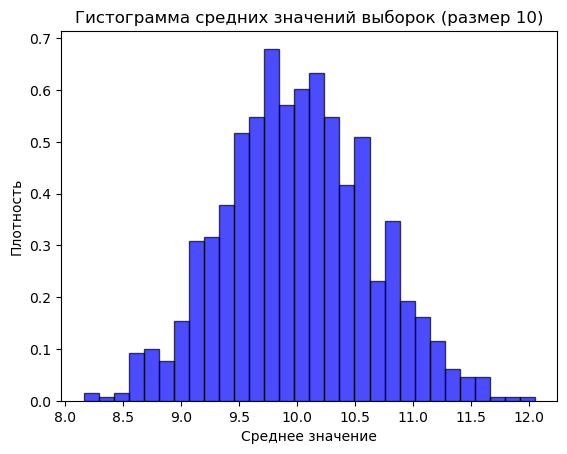

Размер выборки: 10
Выборочное среднее: 10.007703067133251
Выборочное стандартное отклонение: 0.6263728120187627
Коэффициент вариации: 6.258906842228981%


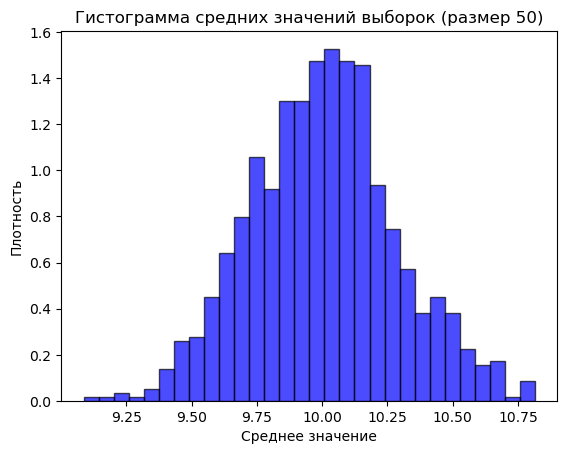

Размер выборки: 50
Выборочное среднее: 10.004590913893034
Выборочное стандартное отклонение: 0.2784953983171164
Коэффициент вариации: 2.783676021479092%


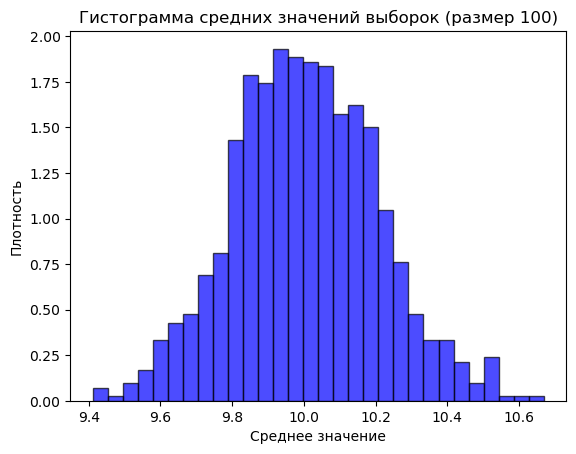

Размер выборки: 100
Выборочное среднее: 10.004505315110288
Выборочное стандартное отклонение: 0.2013706628549371
Коэффициент вариации: 2.0127997988146125%


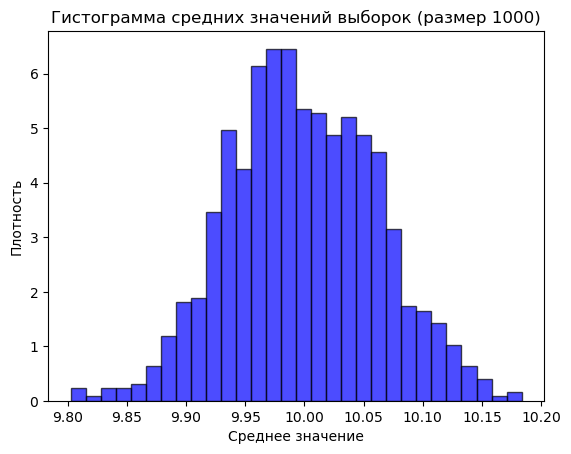

Размер выборки: 1000
Выборочное среднее: 9.998673377098076
Выборочное стандартное отклонение: 0.06259034917238471
Коэффициент вариации: 0.625986536531413%


In [22]:
for sizes in sizes_of_distributions:
    distributions[sizes] = np.random.normal(10, 2, size=(1000, sizes))
    average_values = np.mean(distributions[sizes], axis=1)  # Вычисляем средние значения для каждой выборки

    # Построение гистограммы средних значений
    plt.hist(average_values, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')

    # Настройка графика
    plt.title(f'Гистограмма средних значений выборок (размер {sizes})')
    plt.xlabel('Среднее значение')
    plt.ylabel('Плотность')

    # Показать график
    plt.show()

    # Вычисляем выборочное среднее, стандартное отклонение и коэффициент вариации
    sample_mean = np.mean(average_values)
    sample_std_dev = np.std(average_values,
                            ddof=1)  # Используем ddof=1 для вычисления несмещенной оценки стандартного отклонения
    coefficient_of_variation = (sample_std_dev / sample_mean) * 100

    print(f"Размер выборки: {sizes}")
    print(f"Выборочное среднее: {sample_mean}")
    print(f"Выборочное стандартное отклонение: {sample_std_dev}")
    print(f"Коэффициент вариации: {coefficient_of_variation}%")


Исходя из этого, можно понять, что при увеличении объема уменьшается отклонение данных от среднего значения

Задание №3

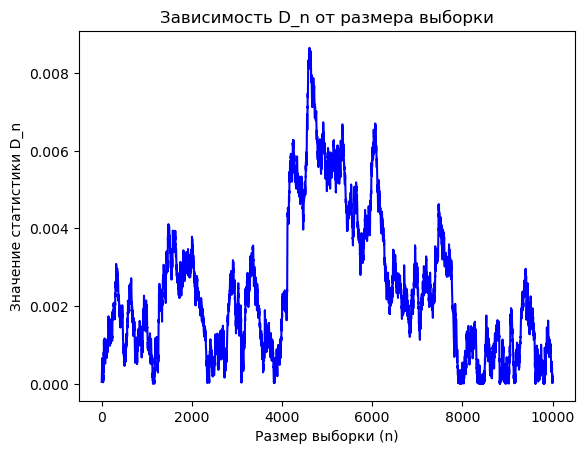

Максимальное значение статистики D_n: 0.008646470794357541


In [23]:
normal_distribution = np.random.normal(size=10000)

# Создаем массив значений x для вычисления эмпирической функции распределения
x_values = np.sort(normal_distribution)

empirical_cdf = np.arange(1, 10000 + 1) / 10000

# Вычисляем значение статистики D_n для каждого размера выборки
D_n_values = np.abs(empirical_cdf - norm.cdf(x_values))
D_n_max = np.max(D_n_values)

# Построение графика зависимости статистики D_n от n
plt.plot(range(1, 10000 + 1), D_n_values, color='b')
plt.xlabel('Размер выборки (n)')
plt.ylabel('Значение статистики D_n')
plt.title('Зависимость D_n от размера выборки')
plt.show()

# Вывод максимального значения D_n
print(f"Максимальное значение статистики D_n: {D_n_max}")
